## Part A: Initialize packages and data 

In [1]:
%load_ext autoreload
%autoreload 2

import torch 
import numpy as np
from logistic import LogisticRegression, GradientDescentOptimizer

def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

## Part B: Experiments

Here we run a gradient descent loop 

### Vanilla Gradient Descent 
Let us understand how our Vanilla Gradient Descent works


In [14]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

vanilla_loss_vec = []
for _ in range(10000):
    loss = LR.loss(X, y) 
    vanilla_loss_vec.append(loss)
    opt.step(X, y, alpha = 0.04, beta = 0)

We first perform our vanilla gradient descent, which means $p_{dim} = 2\text{, }α = 0.03\text{, and }β = 0$ 
we  can see from our line that it converges to the correct weight vector around 6000 iterations

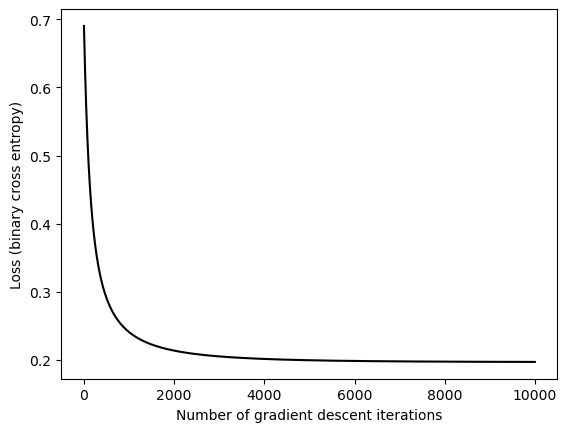

In [15]:
from matplotlib import pyplot as plt
plt.plot(vanilla_loss_vec, color = "black")
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

### Using momentum

We then perform our gradient descent with momentum, which means $p_{dim} = 2\text{, }α = 0.03\text{, and }β = 0.9$ 
we can see an extremely sharp drop off from our loss which converges to the correct weight vector around a few hundred iterations

In [34]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

momentum_loss_vec = []
for _ in range(10000):
    loss = LR.loss(X, y) 
    momentum_loss_vec.append(loss)
    opt.step(X, y, alpha = 0.03, beta = .9)

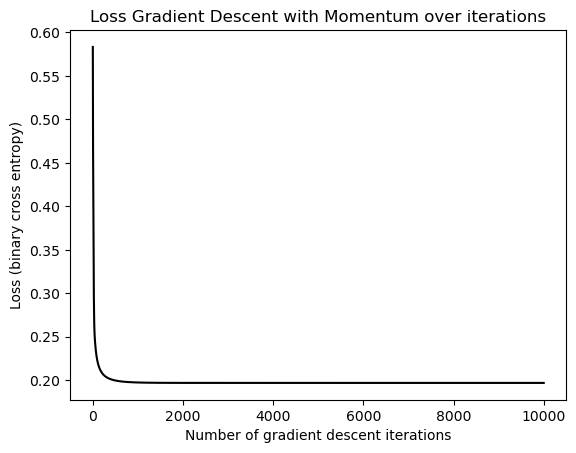

In [36]:
plt.plot(momentum_loss_vec, color = "black")
plt.title("Loss Gradient Descent with Momentum over iterations")
labs = plt.gca().set(xlabel = "Number of gradient descent iterations", ylabel = "Loss (binary cross entropy)")

### Overfitting 
The curse of all scientists trying to make predictions with models is the potential to overfit. If we have more dimensions than we have points, then the data is highly [sparse](https://en.wikipedia.org/wiki/Sparse_matrix), meaning that there are many dimensions with little or no points. With higher dimensionality, the model will more likely to fit to noise.

#### Creating our data 
In order to model what happens when we have more dimensions than we have points, let's call our classification_data function twice so that we can save training data and test dating. That way, we can see what overfitting on our training data causes our predictions to look like on our test data. 

We give them the same parameters 
$$\text{n\_points = 50, noise = 0.5, p\_dims = 100}$$

In [54]:
X_train, y_train = classification_data(n_points = 50, noise = 0.5, p_dims = 100)
X_test, y_test = classification_data(n_points = 50, noise = 0.5, p_dims = 100)

In [77]:
from sklearn.metrics import accuracy_score 

LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

overfit_loss_vec = []
for _ in range(10000):
    loss = LR.loss(X_train, y_train) 
    overfit_loss_vec.append(loss)
    opt.step(X_train, y_train, alpha = 0.001, beta = .8)

y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)


train_prediction = accuracy_score(y_train, y_pred_train)
test_prediction = accuracy_score(y_test, y_pred_test)

print("Training Accuracy: %5.2f Test Accuracy: %5.2f" % (train_prediction, test_prediction))


Training Accuracy:  1.00 Test Accuracy:  0.76


Our final accuracy is $76\%$ for our test data, even though our training data has a final accuracy of $100\%$!

## Discussion 
We have gone quite a few places, so its important to sum up what we have done as well as what we have discovered. We implemented Logistic Regression with Gradient Descent with Momentum. Using our Logistic Regression, we conducted three experiments. The first experiment was our **Vanilla Gradient Descent**. This meant we didn't utilize momentum, and it resulted in a convergence at around 6000 iterations. Using the same parameters, we conducted our second experiment **Gradient Descent with Momentum**. By using momentum, we were able to converge at a faster rate. This was expected as momentum helps our Gradient Descent more quickly reach a local minimum. 